<a href="https://colab.research.google.com/github/MohamedHussein736/Natural-Language-Processing-NLP-Topics/blob/master/Topic%20Modeling/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic (Analysis, classification, Modeling)**
---
## Table of Content:
* What is topic analysis?
*  What is Types of topic analysis?
* What is Topic Modeling?
* Examples of Topic Modeling and Topic Classification
* How does Topic Modeling work?
* Topic Modeling vs Topic Classification
* Topic Modeling
* Topic Classification
* References

##What is Topic Analysis?

**Topic analysis** (often referred to as topic detection or topic modeling) is a machine learning technique that organizes and understands large collections of text data, by assigning tags or categories according to each individual text’s topic or theme. In other words, they enable you to find patterns and unlock semantic structures behind each of the individual texts.

**Examples:**

* identify the topic of a news headline. 
* What is a news article talking about? Is it Politics, Sport, or Economy? 

##Why is Topic Analysis Important for business?

Topic analysis is a fast-growing approach that enables businesses to analyze large quantities of unstructured text data, and understand the main topics of each text such as reviews, NPS surveys, posts on social media, emails, and customer support tickets. Besides discovering the most frequently discussed topics about your product or service, you can also use a topic model to make new discoveries about your business.

##What is types of topic analysis?
* Topic Classification
* Topic Modeling

##What is Types of topic classification?

**Topic classification** needs to know the topics of a text before starting the analysis, because you need to tag data in order to train a topic classifier. Although there’s an extra step involved, topic classifiers pay off in the long run and they’re much more precise than clustering techniques.

##What is Types of topic Modeling?

**Topic modeling** is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. This is known as ‘unsupervised’ machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.

Since topic modeling doesn’t require training, it’s a quick and easy way to start analyzing your data. However, you can’t guarantee you’ll receive accurate results, which is why many businesses opt to invest time training a topic classification model.

For example, let’s say you’re a software company that’s released a new data analysis feature, and you want to analyze what customers are saying about it. You’d first need to create a list of tags (topics) that are relevant to the new feature e.g. Data Analysis, Features, User Experience, then you’d need to use data samples to teach your topic classifier how to tag each text using these predefined topic tags. 

Although topic classification involves extra legwork, this topic analysis technique delivers more accurate results than unsupervised techniques, which means you’ll get more valuable insights that help you make better, data-based decisions.

You could say that unsupervised techniques are a short-term or quick-fix solution, while supervised techniques are more of a long-term solution that will help your business grow. 

<center>
<img src="https://i.pinimg.com/736x/42/b9/75/42b9752d89f40ec8255112e21f6d714c.jpg" width="600" height="350" align="center"/> </center>

##Topic Modeling vs Topic Classification

unsupervised machine learning algorithms such as topic modeling require less manual input than supervised algorithms. That’s because they don’t need to be trained by humans with manually tagged data. However, they do need high-quality data, and not only that – they need it in bucket loads, which may not always be easy to come by.

At the end of your topic modeling analysis, you’ll receive collections of documents that the algorithm has grouped together, as well as clusters of words and expressions that it used to infer these relations.

Supervised machine learning algorithms, on the other hand, deliver neatly packaged results with topic labels such as Price. Yes, they take longer to set up since you’ll need to train them by tagging datasets with a predefined list of topics. But, if you label your texts accurately and refine your criteria, you’ll be rewarded with a model that can accurately classify unseen texts according to their topics, as well as results that you can put to use.

At the end of the day, it comes down to this. If you don’t have a lot of time to analyze texts, or you’re not looking for a fine-grained analysis and just want to figure out what topics a bunch of texts are talking about, you’ll probably be happy with a topic modeling algorithm.


##Topic modeling methods:
* Latent Semantic Analysis (LSA)
* Latent Dirichlet allocation (LDA)

##Latent Semantic Analysis (LSA)





In [0]:
! pip install pyLDAvis

In [0]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [0]:

# since we're working in python 2.7 in this tutorial, we need to make sure to clean our data to make it unicode consistent
def clean(text):
    return unicode(''.join([i if ord(i) < 128 else ' ' for i in text]))

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [0]:
test_data_dir

'/usr/local/lib/python2.7/dist-packages/gensim/test/test_data'

In [0]:
lee_train_file

'/usr/local/lib/python2.7/dist-packages/gensim/test/test_data/lee_background.cor'

In [0]:
import spacy
nlp = spacy.load("en")

In [0]:
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [0]:
doc = nlp(clean(text))

In [0]:
my_stop_words

[u'say', u"'s", u'Mr', u'be', u'said', u'says', u'saying']

In [0]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [0]:
# we add some words to the stop word list
texts, article, skl_texts = [], [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        skl_texts.append(' '.join(article))
        texts.append(article)
        article = []

In [0]:
bigram = gensim.models.Phrases(texts)

In [0]:
texts = [bigram[line] for line in texts]

In [0]:
texts[1][0:10]

[u'indian',
 u'security_force',
 u'shoot_dead',
 u'suspect',
 u'militant',
 u'night',
 u'long',
 u'encounter',
 u'southern',
 u'Kashmir']

In [0]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [0]:
corpus[1][0:10]

[(83, 1),
 (91, 1),
 (93, 1),
 (94, 1),
 (109, 1),
 (110, 1),
 (111, 1),
 (112, 4),
 (113, 1),
 (114, 1)]

In [0]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [0]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  u'0.240*"israeli" + 0.215*"Arafat" + 0.199*"palestinian" + 0.175*"force" + 0.159*"official" + 0.159*"kill" + 0.152*"attack" + 0.141*"people" + 0.118*"day" + 0.117*"Israel"'),
 (1,
  u'-0.311*"israeli" + -0.299*"Arafat" + -0.271*"palestinian" + 0.161*"Afghanistan" + -0.160*"Sharon" + 0.159*"Australia" + -0.154*"Israel" + -0.127*"Hamas" + -0.121*"West_Bank" + 0.116*"day"'),
 (2,
  u'0.258*"Afghanistan" + 0.222*"force" + -0.187*"fire" + 0.187*"Al_Qaeda" + 0.176*"bin_Laden" + 0.155*"Pakistan" + -0.148*"Sydney" + 0.134*"fighter" + 0.132*"Tora_Bora" + 0.121*"Taliban"'),
 (3,
  u'0.374*"fire" + 0.271*"area" + -0.213*"Australia" + 0.200*"Sydney" + 0.172*"firefighter" + 0.158*"north" + 0.149*"wind" + 0.135*"Wales" + 0.135*"New_South" + 0.131*"south"'),
 (4,
  u'-0.273*"company" + -0.208*"Qantas" + -0.180*"union" + 0.152*"win" + -0.149*"worker" + 0.139*"match" + 0.135*"South_Africa" + 0.127*"wicket" + 0.119*"test" + 0.117*"day"')]

In [0]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics()

[(0,
  u'0.003*israeli + 0.003*palestinian + 0.003*group + 0.003*Hamas + 0.003*militant + 0.002*kill + 0.002*arrest + 0.002*Sharon + 0.002*Government + 0.002*choose + 0.002*police + 0.002*source + 0.002*security + 0.002*West_Bank + 0.002*suicide_attack + 0.002*armed + 0.002*soldier + 0.002*state + 0.002*attack + 0.002*Israel'),
 (1,
  u'0.003*India + 0.003*match + 0.002*Australia + 0.002*ask + 0.002*israeli + 0.002*law + 0.002*Government + 0.002*union + 0.002*play + 0.002*job + 0.002*Rafter + 0.002*tennis + 0.001*Sheriff + 0.001*team + 0.001*guarantee + 0.001*want + 0.001*warn + 0.001*late + 0.001*France + 0.001*consign'),
 (2,
  u'0.003*airport + 0.003*Taliban + 0.002*Government + 0.002*opposition + 0.002*night + 0.002*cent + 0.002*help + 0.002*kill + 0.002*city + 0.002*Kandahar + 0.002*bid + 0.002*leave + 0.002*near + 0.002*bombing + 0.001*ask + 0.001*people + 0.001*Lali + 0.001*dominance + 0.001*Gul + 0.001*Lew'),
 (3,
  u'0.004*israeli + 0.004*Arafat + 0.003*Sharon + 0.002*official

In [0]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldamodel.show_topics()

[(0,
  u'0.004*"man" + 0.004*"israeli" + 0.004*"attack" + 0.004*"Arafat" + 0.004*"day" + 0.004*"company" + 0.004*"tell" + 0.003*"Australia" + 0.003*"people" + 0.003*"group"'),
 (1,
  u'0.007*"Australia" + 0.006*"israeli" + 0.004*"Arafat" + 0.004*"United_States" + 0.004*"people" + 0.004*"official" + 0.004*"force" + 0.004*"Afghanistan" + 0.004*"australian" + 0.003*"palestinian"'),
 (2,
  u'0.005*"people" + 0.004*"year" + 0.004*"Pakistan" + 0.004*"new" + 0.004*"claim" + 0.003*"day" + 0.002*"work" + 0.002*"set" + 0.002*"old" + 0.002*"today"'),
 (3,
  u'0.005*"year" + 0.004*"day" + 0.004*"Australia" + 0.003*"new" + 0.003*"take" + 0.003*"australian" + 0.003*"wicket" + 0.003*"give" + 0.003*"second" + 0.003*"group"'),
 (4,
  u'0.007*"israeli" + 0.005*"palestinian" + 0.005*"kill" + 0.005*"Hamas" + 0.005*"people" + 0.004*"Israel" + 0.004*"attack" + 0.004*"arrest" + 0.003*"area" + 0.003*"tell"'),
 (5,
  u'0.005*"day" + 0.005*"force" + 0.005*"Australia" + 0.004*"come" + 0.004*"know" + 0.003*"give"

In [0]:
pyLDAvis.enable_notebook()

In [0]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
6      16.226088        1       1 -0.004578  0.040643
0      13.012558        1       2  0.026471 -0.028223
9      12.249386        1       3  0.011633  0.022444
5      11.458797        1       4  0.000244  0.037872
1      10.306869        1       5  0.036650  0.001820
4       9.726979        1       6  0.044929 -0.025523
3       9.235825        1       7 -0.044288  0.010678
8       7.527390        1       8  0.001837  0.013146
2       5.286305        1       9 -0.070950 -0.029704
7       4.969806        1      10 -0.001948 -0.043154, topic_info=     Category        Freq           Term       Total  loglift  logprob
2068  Default   80.000000        israeli   80.000000  30.0000  30.0000
3056  Default   30.000000          India   30.000000  29.0000  29.0000
3968  Default   57.000000         Arafat   57.000000  28.0000  28.0000
37    Default   37.000000          Hamas   37.000000  27.0000  27.0000
311   Default  108.000000         people  108.000000  26.0000  26.0000
5497  Default   39.000000       Pakistan   39.000000  25.0000  25.0000
3383  Default  113.000000      Australia  113.000000  24.0000  24.0000
1533  Default   65.000000    palestinian   65.000000  23.0000  23.0000
783   Default   61.000000        company   61.000000  22.0000  22.0000
4277  Default   31.000000         Qantas   31.000000  21.0000  21.0000
4315  Default   30.000000          staff   30.000000  20.0000  20.0000
1942  Default   20.000000        economy   20.000000  19.0000  19.0000
2646  Default   16.000000            HIH   16.000000  18.0000  18.0000
892   Default    9.000000          virus    9.000000  17.0000  17.0000
1988  Default   92.000000           year   92.000000  16.0000  16.0000
2110  Default   38.000000         Israel   38.000000  15.0000  15.0000
692   Default    7.000000        Lockett    7.000000  14.0000  14.0000
441   Default   19.000000         wicket   19.000000  13.0000  13.0000
5104  Default   25.000000       director   25.000000  12.0000  12.0000
4945  Default    5.000000         farmer    5.000000  11.0000  11.0000
1458  Default   69.000000       official   69.000000  10.0000  10.0000
4735  Default   18.000000          catch   18.000000   9.0000   9.0000
1148  Default   18.000000         indian   18.000000   8.0000   8.0000
5124  Default   64.000000           kill   64.000000   7.0000   7.0000
2978  Default   64.000000            new   64.000000   6.0000   6.0000
4687  Default   68.000000         report   68.000000   5.0000   5.0000
2107  Default   32.000000         return   32.000000   4.0000   4.0000
3404  Default   49.000000          claim   49.000000   3.0000   3.0000
4947  Default   25.000000      West_Bank   25.000000   2.0000   2.0000
236   Default   39.000000          union   39.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
5150  Topic10    2.276876       New_York   17.582930   0.9577  -6.4440
311   Topic10    5.227024         people  108.583618  -0.0319  -5.6129
3719  Topic10    1.854631      important   12.561699   1.0888  -6.6491
375   Topic10    3.902513           time   63.541664   0.2117  -5.9051
5855  Topic10    3.215223           lead   41.763458   0.4377  -6.0989
533   Topic10    2.804806           city   32.247066   0.5597  -6.2354
1988  Topic10    4.368327           year   92.279541  -0.0487  -5.7924
972   Topic10    3.774907           fire   66.247208   0.1368  -5.9384
1779  Topic10    2.802624          night   33.123074   0.5321  -6.2362
3968  Topic10    3.426872         Arafat   57.796879   0.1765  -6.0351
3158  Topic10    3.119994         Sydney   48.642136   0.2551  -6.1289
5702  Topic10    2.071123         Centre   16.571018   0.9222  -6.5387
3099  Topic10    1.913658         matter   13.517697   1.0468  -6.6177
5050  Topic10    3.309692           come   62.361443   0.0657  -6.0699
2821  Topic10    2.919055           cent   

In [0]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [0]:
prob 

0.0028931242

In [0]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [0]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

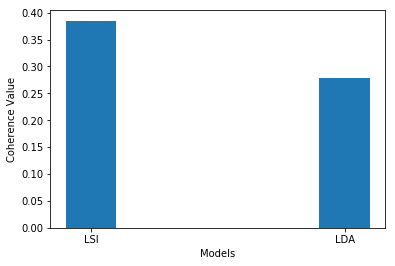

In [0]:
evaluate_bar_graph([lsi_coherence, lda_coherence],['LSI', 'LDA'])

##**References**

https://monkeylearn.com/blog/introduction-to-topic-modeling/

https://monkeylearn.com/text-analysis/

https://en.wikipedia.org/wiki/Topic_model

https://www.youtube.com/watch?v=ZkAFJwi-G98

https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d

https://github.com/bhargavvader/personal/tree/master/notebooks/text_analysis_tutorial